In [189]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [144]:
dataset = pd.read_csv('P39-CS3-Data/appdata10.csv')
dataset1 = dataset.copy().drop( columns = ['user', 'screen_list','enrolled_date', 'first_open','enrolled'])
dataset1['hour'] = dataset1['hour'].str.slice(1,3).astype(int)
dataset1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [60]:
dataset1.iloc[:,0].unique()

array([3, 6, 1, 4, 2, 0, 5])

In [52]:
#p = dataset1['dayofweek'] > 5
#dataset1['dayofweek'][p]

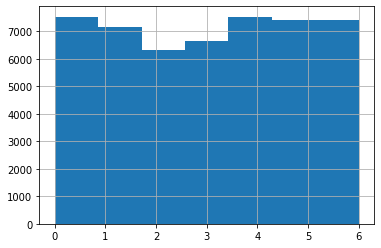

In [34]:
dataset1.iloc[:,0].hist(bins = 7)

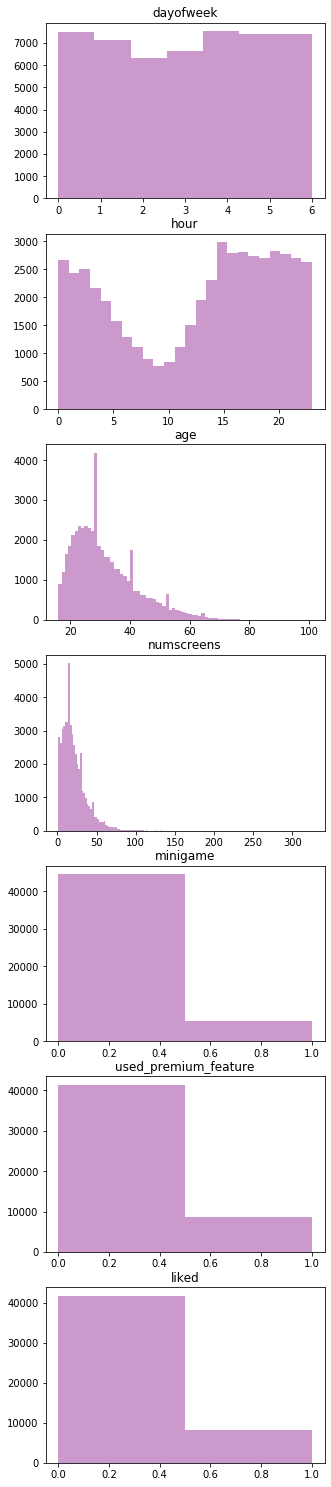

In [185]:
fig, axs = plt.subplots(7,1, figsize = (5,10))
plt.subplots_adjust(top = 5, bottom =3)
for i in range(0,7):
    bin_var = len(dataset1.iloc[:,i].unique())
    try:
        axs[i].set_title(dataset1.columns.values[i])
        axs[i].hist(dataset1.iloc[:,i], bins = bin_var, color = 'purple', alpha = 0.4)
    except IndexError:
        pass

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

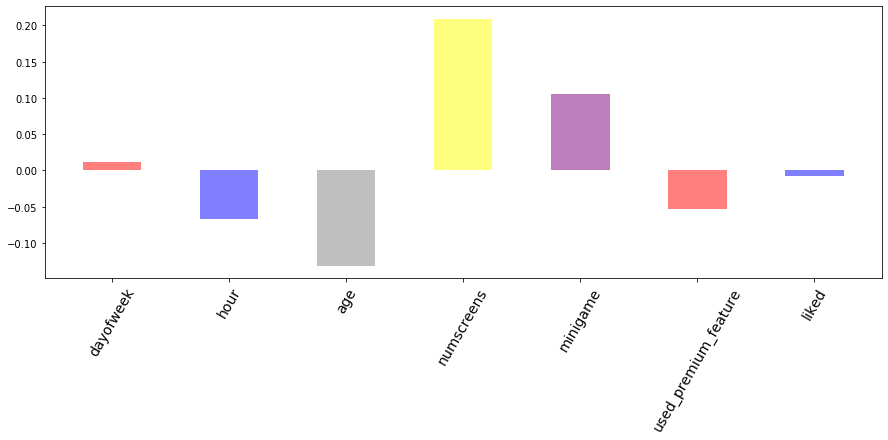

In [188]:
Corr = dataset1.corr()
Corr_enroll = dataset1.corrwith(dataset.enrolled)
plt.figure(figsize = (15,5))
plt.bar( Corr_enroll.index, height = Corr_enroll, width = 0.5, color = ['r','b', 'grey','yellow','purple'], alpha = 0.5)
plt.xticks(rotation=60, fontsize = 14)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

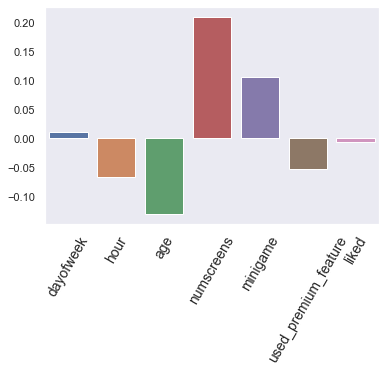

In [196]:
sns.set(style = 'darkgrid')
sns.barplot(x = Corr_enroll.index, y = Corr_enroll)
plt.xticks(rotation=60, fontsize = 14)

[[False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]
[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


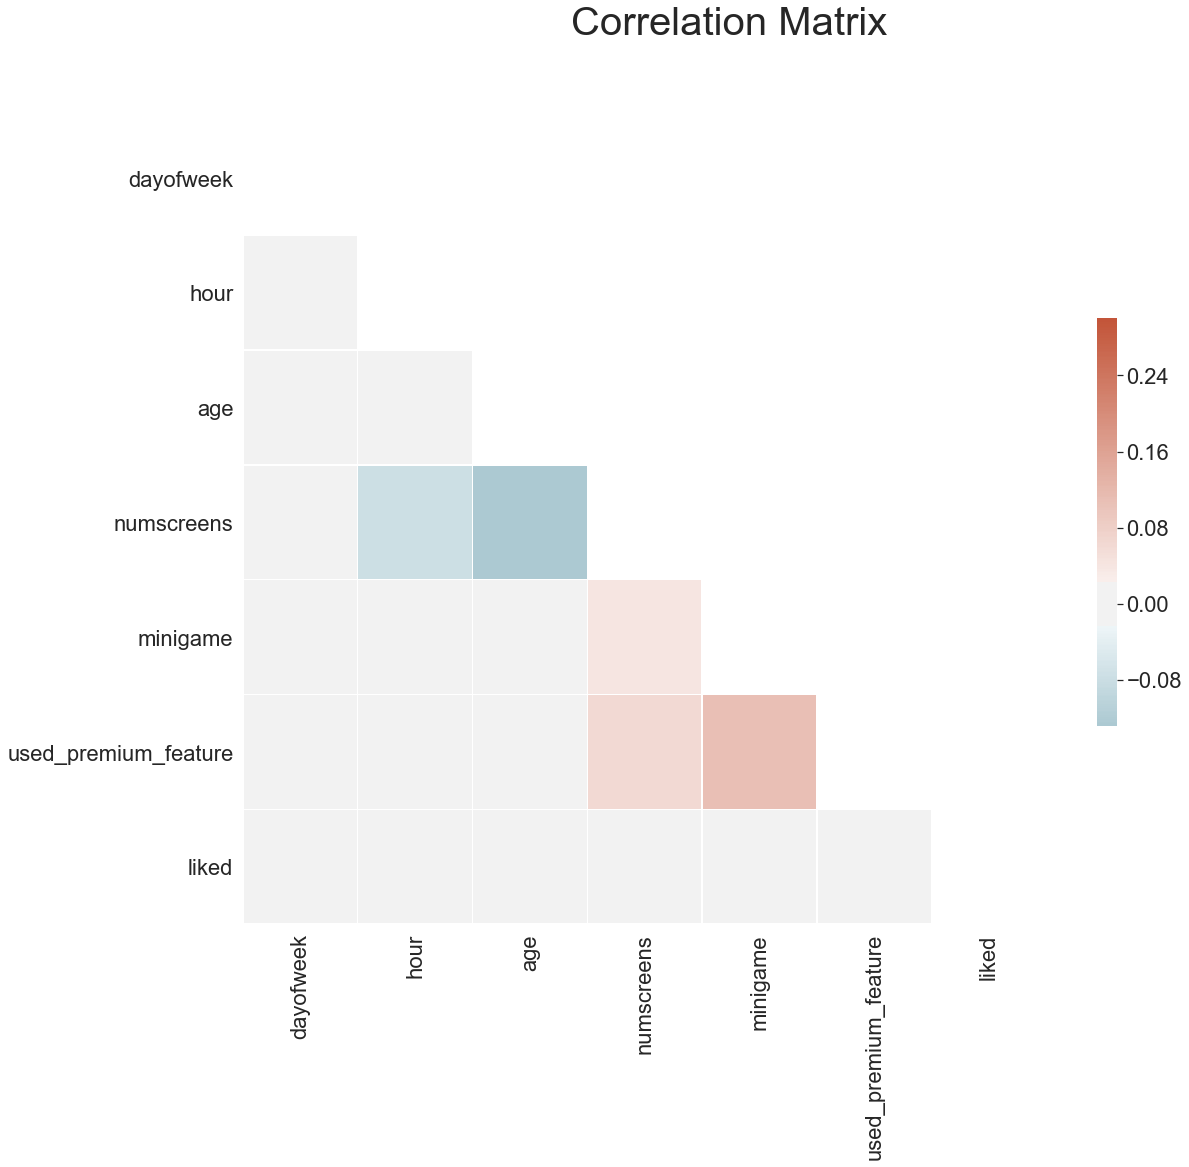

In [205]:
sn.set(style="whitegrid", font_scale=2)
corr = dataset1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
print(mask)

fig, ax = plt.subplots(figsize=(18, 15))
fig.suptitle("Correlation Matrix", fontsize = 40)
cmap = sn.diverging_palette(220, 20, sep=20, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [208]:
dataset2 = pd.read_csv('P39-CS3-Data/new_appdata10.csv')
dataset2.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [211]:
dataset2.dtypes


user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [207]:
dataset2["first_open"] = [parser.parse(row_date) for row_date in dataset2["first_open"]]
dataset2["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset2["enrolled_date"]]
dataset2.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object